### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3
#### Кластеризация
### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Малашенко Марина Владимировна
##### Группа:   НФИбд-01-20

## Москва 2023
***

### Вариант №_29_

Вариант 29 

Steel Plates Faults Data Set 

Название файла: Faults.NNA 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Steel+Plates+Faults 

Первый признак: Edges_Index (столбец No 15) 

Второй признак: Empty_Index (столбец No 16) 

Класс: Pastry (столбец No 28) 

Алгоритмы: K-means, Affinity Propagation, Mean Shift, mini-batch K-Means 

Меры качества: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара 

Найти лучший алгоритм кластеризации относительно меры качества: индекс Жаккара 

##### 1. Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
# будем считывать файл локально, потому что открытие по ссылке невозможно (404 Not Found)

my_data = pd.read_csv('Faults.NNA', sep='\s+', header=None) 
my_data

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [5]:
my_data = my_data[[15,16,28]]
my_data

,15,16,28
0,0.2415,0.1818,0
1,0.3793,0.2069,0
2,0.3426,0.3333,0
3,0.4413,0.1556,0
4,0.4486,0.0662,0
...,...,...,...
1936,0.3906,0.5714,0
1937,0.4554,0.5484,0
1938,0.3287,0.5172,0
1939,0.5904,0.9394,0


##### 2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

In [6]:
# согласно проверкам и данным на сайте, в датасете отсуствуют пропущенные значения

import warnings
warnings.filterwarnings("ignore")
print('Пропущенных значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))

Пропущенных значений:
	15: 0
	16: 0
	28: 0


##### 3. Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало пять.

In [7]:
unique_values_count = my_data.iloc[:, 2].nunique()
unique_values_count

# в столбце, отвечающем за метку класса, не встречается более двух различных значений. объединение не требуется.

2

##### 4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

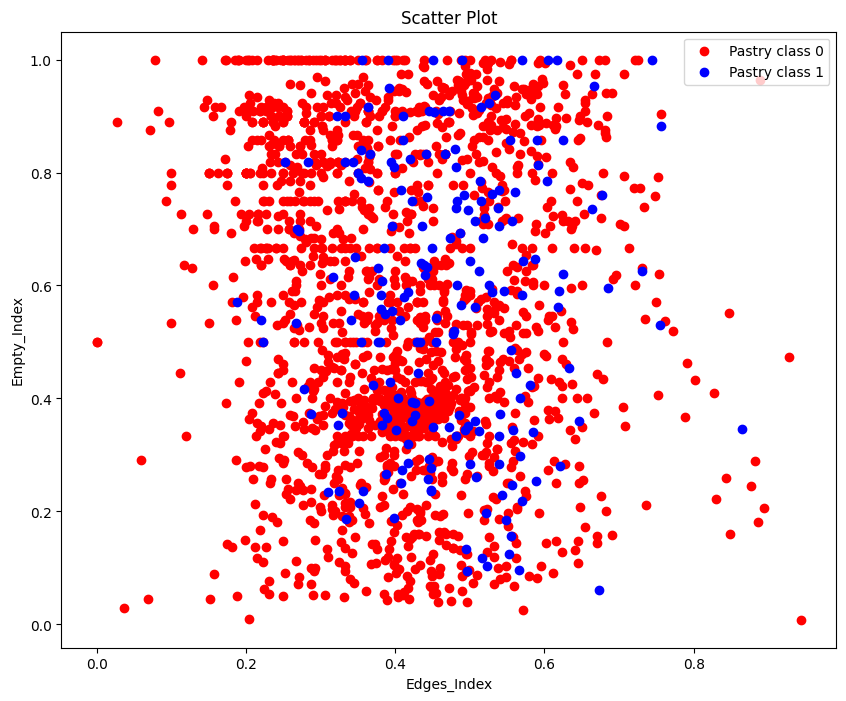

In [8]:
# выбираем признаки (столбцы 0 и 1) и метку класса (столбец 2)
features = my_data.iloc[:, [0, 1]]
labels = my_data.iloc[:, 2]

# разделяем точки по классам (выяснили 2 класса: 0 и 1 в предыдущем пункте)
class_0 = features[labels == 0]
class_1 = features[labels == 1]

# отрисовка графика
plt.figure(figsize=(10, 8))
plt.scatter(class_0.iloc[:, 0], class_0.iloc[:, 1], label='Pastry class 0', marker='o', c='red') # точки класса 0 красные
plt.scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], label='Pastry class 1', marker='o', c='blue') # точки класса 1 синие

# подписи осей и рисунка
plt.xlabel('Edges_Index')
plt.ylabel('Empty_Index')
plt.title('Scatter Plot')

plt.legend()
plt.show()

##### 5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

Алгоритмы по варианту 29: K-means, mini-batch K-Means, Mean Shift, Affinity Propagation

In [9]:
my_data2 = my_data.iloc[:, [0, 1]] # оставим 2 признака
my_data2

,15,16
0,0.2415,0.1818
1,0.3793,0.2069
2,0.3426,0.3333
3,0.4413,0.1556
4,0.4486,0.0662
...,...,...
1936,0.3906,0.5714
1937,0.4554,0.5484
1938,0.3287,0.5172
1939,0.5904,0.9394


In [10]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=2)
model1.fit(my_data2)
yhat1 = model1.predict(my_data2)

yhat1
#plot_cluster(my_data2,yhat1)

array([0, 0, 0, ..., 0, 1, 1])

array([1, 1, 1, ..., 1, 0, 0])

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

Меры качества по варианту 29: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара 

In [14]:
from sklearn.metrics.cluster import contingency_matrix # для построения матриц сопряженности

In [15]:
from sklearn.metrics import confusion_matrix # матрицы ошибок для парных мер

In [16]:
from sklearn.metrics import f1_score # для нахождения F-меры

In [17]:
from sklearn.metrics import jaccard_score # для нахождения индекса Жаккара

Kmeans

In [18]:
# вычисляем матрицу сопряженности (contingency matrix)
matrix_Kmeans = contingency_matrix(my_data.iloc[:, 2], yhat1)
print(matrix_Kmeans)

# вычисляем матрицу ошибок (confusion matrix)
conf_matrix = confusion_matrix(my_data.iloc[:, 2], yhat1)
# извлекаем значения TP, FN, FP, TN из матрицы ошибок
TN, FP, FN, TP = conf_matrix.ravel()
print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)

# вычисляем F-меру
f_measure = f1_score(my_data.iloc[:, 2], yhat1)
print("F-мера кластеризации:", f_measure)

# вычисляем Индекс Жаккара
jaccard_index = jaccard_score(my_data.iloc[:, 2], yhat1)
print("Индекс Жаккара:", jaccard_index)

[[938 813]
 [102  88]]
True Positives (TP): 88
False Negatives (FN): 102
False Positives (FP): 813
True Negatives (TN): 938
F-мера кластеризации: 0.1613198900091659
Индекс Жаккара: 0.08773678963110668


MiniBatchKMeans

In [19]:
matrix_MiniBatchKMeans = contingency_matrix(my_data.iloc[:, 2], yhat2)
print(matrix_MiniBatchKMeans)

conf_matrix = confusion_matrix(my_data.iloc[:, 2], yhat2)
TN, FP, FN, TP = conf_matrix.ravel()
print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)

f_measure = f1_score(my_data.iloc[:, 2], yhat2)
print("F-мера кластеризации:", f_measure)

jaccard_index = jaccard_score(my_data.iloc[:, 2], yhat2)
print("Индекс Жаккара:", jaccard_index)

[[823 928]
 [ 92  98]]
True Positives (TP): 98
False Negatives (FN): 92
False Positives (FP): 928
True Negatives (TN): 823
F-мера кластеризации: 0.16118421052631576
Индекс Жаккара: 0.08765652951699464


MeanShift

In [20]:
matrix_MeanShift = contingency_matrix(my_data.iloc[:, 2], yhat3)
print(matrix_MeanShift)

conf_matrix = confusion_matrix(my_data.iloc[:, 2], yhat3)
TN, FP, FN, TP = conf_matrix.ravel()
print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)

f_measure = f1_score(my_data.iloc[:, 2], yhat3)
print("F-мера кластеризации:", f_measure)

jaccard_index = jaccard_score(my_data.iloc[:, 2], yhat3)
print("Индекс Жаккара:", jaccard_index)

[[986 765]
 [109  81]]
True Positives (TP): 81
False Negatives (FN): 109
False Positives (FP): 765
True Negatives (TN): 986
F-мера кластеризации: 0.15637065637065636
Индекс Жаккара: 0.08481675392670157


AffinityPropagation - в данном алгоритме очень сложно подобрать параметры для нужного количества кластеров (2), но сделав это, мы получаем достаточно высокий индекс Жаккара (на фоне остальных алгоритмов) и аналогично с F-мерой.

In [21]:
matrix_AffinityPropagation = contingency_matrix(my_data.iloc[:, 2], yhat4)
print(matrix_AffinityPropagation)

conf_matrix = confusion_matrix(my_data.iloc[:, 2], yhat4)
TN, FP, FN, TP = conf_matrix.ravel()
print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)

f_measure = f1_score(my_data.iloc[:, 2], yhat4)
print("F-мера кластеризации:", f_measure)

jaccard_index = jaccard_score(my_data.iloc[:, 2], yhat4)
print("Индекс Жаккара:", jaccard_index)

[[871 880]
 [ 86 104]]
True Positives (TP): 104
False Negatives (FN): 86
False Positives (FP): 880
True Negatives (TN): 871
F-мера кластеризации: 0.17717206132879046
Индекс Жаккара: 0.09719626168224299


##### 7. Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

Оптимальная мера качества по варианту 29: индекс Жаккара 

На основании всего вышевысчитанного, наивысший индекс Жаккара имеет алгоритм Affinity Propagation (Индекс Жаккара: 0.09719626168224299)

##### 8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

In [22]:
np_my_data2 = my_data2.to_numpy()
np_my_data2

array([[0.2415, 0.1818],
       [0.3793, 0.2069],
       [0.3426, 0.3333],
       ...,
       [0.3287, 0.5172],
       [0.5904, 0.9394],
       [0.6781, 0.8   ]])

In [23]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.0001  # point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = np_my_data2[:, 0].min(), np_my_data2[:, 0].max()
y_min, y_max = np_my_data2[:, 1].min(), np_my_data2[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [24]:
Z.shape

(9917, 9439)

In [25]:
my_data2[0] = model4.labels_
my_data2.head()

,15,16,0
0,0.2415,0.1818,0
1,0.3793,0.2069,0
2,0.3426,0.3333,0
3,0.4413,0.1556,0
4,0.4486,0.0662,0


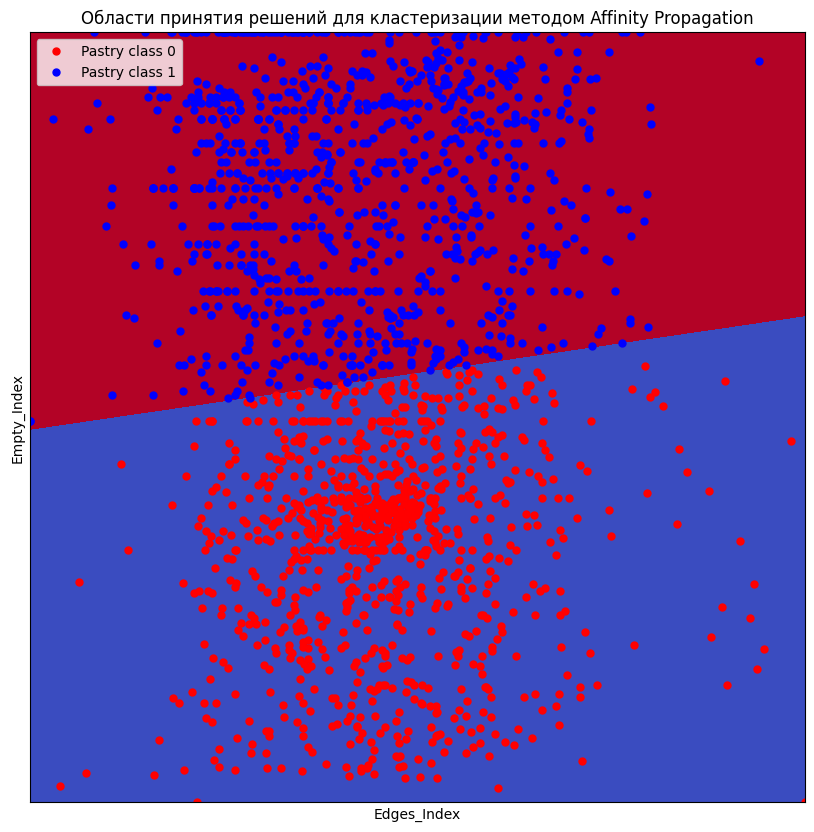

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.coolwarm, 
    aspect="auto",
    origin="lower",
)

colors = ["ro", "bo"]

for i in np.sort(my_data2[0].unique()):
  classes = my_data2.loc[my_data2[0] == i]
  plt.plot(classes[15], classes[16], colors[i],markersize=5, label=str(i))

plt.title("Области принятия решений для кластеризации методом Affinity Propagation")
plt.xlabel("Edges_Index")
plt.ylabel("Empty_Index")
plt.legend(labels=["Pastry class 0", "Pastry class 1"])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());